## Introducción

El mundo medico esta en constante evolución y es impuslado por el insesante deseo de mejorar la calidad de la vida y prolongarla. El cancer es una enfermedad increiblemente desafiante y temida en el mundo por la dificultad para detectarla a tiempo y tratarla adecuadamentee. El uso e implementación de tecnicas de machine learning para detectar a tiempo estas enfermedades haciendo uso de las redes neuronales para clasificar imagenes de resonanciaa magneticas del cerebro

## Datos

Los datos fueron obtenidos de un dataset de kaggle

URL del dataset: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Desarrollo del modelo

Lo primero que se hizo fue redimensionar las imagenes que estaban alojadas en una carpeta de drive para facilitar su acceso

Enlace carpeta: https://drive.google.com/drive/folders/1nmLoOazEL5nMdmmMmeIxf7u0a0AmMDO3?usp=sharing

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dimensiones para redimensionar las imágenes
IMG_HEIGHT, IMG_WIDTH = 150, 150

# Directorios de entrenamiento y prueba
train_dir = '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Training'
test_dir = '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing'


##Modelo 1

Para este primer modelo se trataron de usar todos los approaches necesarios para mejorar el modelo como la implementación de técnicas de Data Augmentation, definicion de batch size y el uso de ImageGenerator para procesar las imagenes rápido

In [71]:
batch_size = 32

#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

#Validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

#Test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


La estructura de nuestro modelo consta de 4 capas convolucionales o CNN y una capa densa con funciones de activación relu, para agilizar nuestra red, usando el optimizador Adam, la función de perdida categorical_crossentropy y el accuracy como metrica de evaluación

In [72]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Se definieron 25 epocas para agilizar este primer approach y se empezo a entrenar nuestra red

In [74]:
epochs = 25
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Epoch 1/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 60s 689ms/step - accuracy: 0.3372 - loss: 5.7140 - val_accuracy: 0.3199 - val_loss: 2.1956
Epoch 2/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5000 - loss: 1.5362 - val_accuracy: 0.3103 - val_loss: 1.9468
Epoch 3/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 53s 376ms/step - accuracy: 0.4552 - loss: 1.5116 - val_accuracy: 0.2868 - val_loss: 2.1247
Epoch 4/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.4036 - val_accuracy: 0.3103 - val_loss: 2.0083
Epoch 5/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - accuracy: 0.4960 - loss: 1.1703 - val_accuracy: 0.3125 - val_loss: 1.6471
Epoch 6/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 1.2621 - val_accuracy: 0.3793 - val_loss: 1.5061
Epoch 7/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 29s 377ms/step - accuracy: 0.5205 - loss: 1.0868 - val_accuracy: 0.3529 - val_loss: 1.4488
Epoch 8/25
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4688 - loss: 1.1210 - val_accuracy: 0.241

El accuracy que se obtuvo no fue el esperado y se trataron de realizar varias mejoras para el siguiente modelo

In [75]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.3035 - loss: 8.9659
Test Accuracy: 33.07%


## Modelo 2

Para este nuevo modelo se cambiaron los parametros de Data Augmentation teniendo cuidado de que los tumores reflegados en cada imagen no perdieran visibilidad por los parametros de data augmentation, se cambio el batch size, ademas se usaron escalas de grises para que el modelo fuera más facil de procesar y la arquitectura del modelo

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Dimensiones de imagen más pequeñas y en escala de grises
IMG_HEIGHT, IMG_WIDTH = 150, 150

# Generador de datos con rescale a escala de grises
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=np.random.uniform(10,45),
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

batch_size = 16

# Configuramos el flujo de imágenes en escala de grises
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


Este nuevo modelo tiene más capas CNN y muchos más parametros para entrenar, ademas el learning rate es más pequeño

In [64]:
# Modelo CNN optimizado
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


In [66]:
# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [67]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)                   │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 34, 34, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,119,620 (99.64 MB)

 Trainable params: 26,118,532 (99.63 MB)

 Non-trainable params: 1,088 (4.25 KB)

Para este nuevo intento se agregaron 100 epocas para dejar que el modelo trabaje y se entrene más

In [68]:
# Entrenamiento del modelo con menos épocas
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 170ms/step - accuracy: 0.5080 - loss: 2.0982 - val_accuracy: 0.2857 - val_loss: 6.2286
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 1.2835 - val_accuracy: 0.3846 - val_loss: 5.5875
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.6610 - loss: 1.0260 - val_accuracy: 0.2875 - val_loss: 11.1692
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7500 - loss: 0.7087 - val_accuracy: 0.3077 - val_loss: 11.1644
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.6806 - loss: 0.8402 - val_accuracy: 0.3089 - val_loss: 13.0396
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.4375 - loss: 1.0450 - val_accuracy: 0.2308 - val_loss: 12.9524
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.7225 - loss: 0.7100 - val_accuracy: 0.4786 - val_loss: 2.5325
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6250 - l

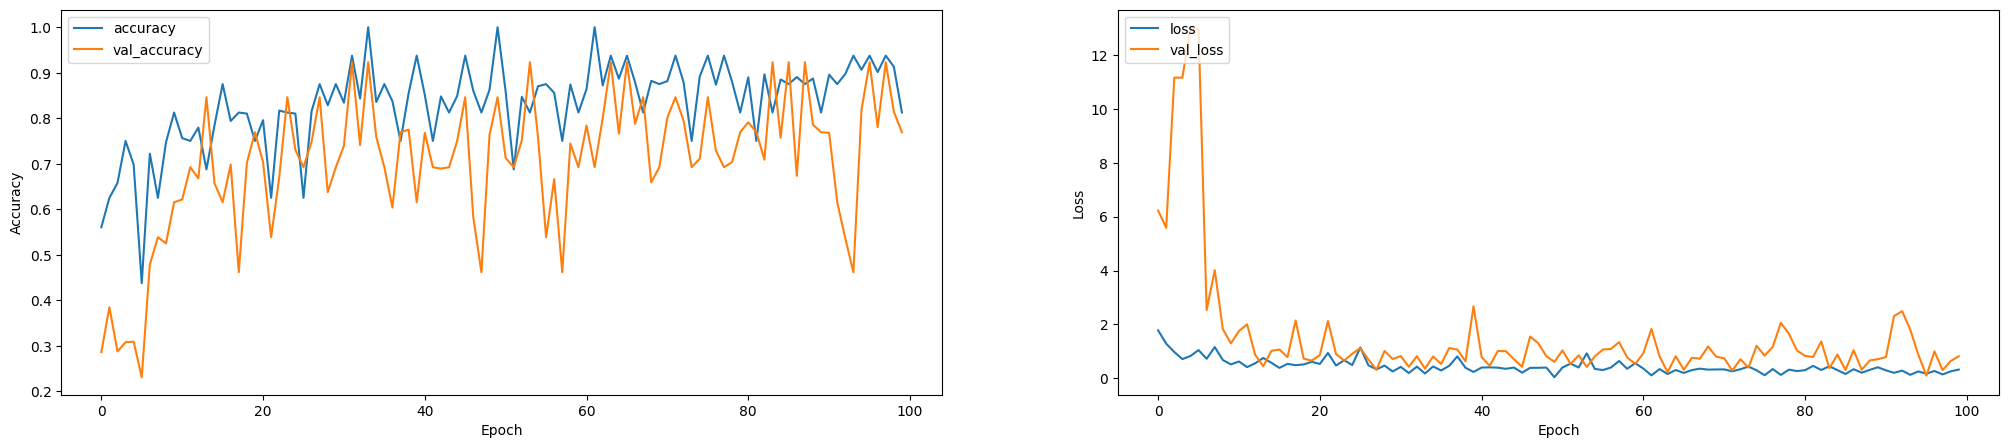

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

Este nuevo modelo probo tener un mucho mejor accuracy pero sigue sin ser el más optimo o confiable

In [70]:
# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6705 - loss: 8.2138
Test Accuracy: 68.49%


In [79]:
# Guardar el modelo en formato Keras
model.save('modelo.keras')

# Guardar el modelo en formato HDF5
model.save('modelo.h5')


## Código para clsificación de imagen nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: meningioma_tumor
Prediction confidence: 41.97%


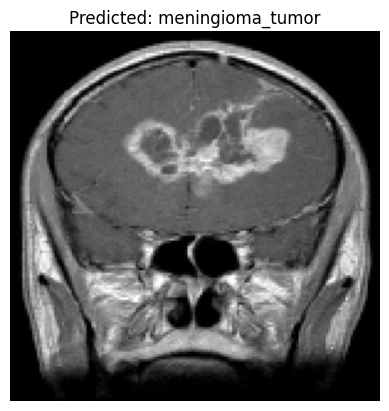

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: meningioma_tumor
Prediction confidence: 41.97%


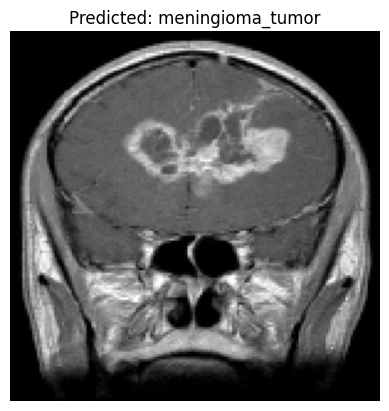

In [80]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(model, img_path, target_size=(150, 150)):
    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.repeat(img_array, 3, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Realizar la predicción
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])

    # Mostrar la imagen y la predicción
    class_names = list(train_generator.class_indices.keys())
    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Prediction confidence: {np.max(prediction) * 100:.2f}%")

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

# Ejemplo de uso
predict_image(model, '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing/glioma_tumor/image(1).jpg')



predict_image(model, '/content/drive/MyDrive/Brain Tumor Classification (MRI)/Testing/glioma_tumor/image(1).jpg')


En la función de arriba se puede ver que a pesar de haber acertado en su clasificación el nivel de confianza de la imagen es muy bajo.

## Conclusiones

Apesar de que las mejoras implementadas mjoraron el accuracy a el doble sigue sin ser un modelo que pueda ser bueno para salir a el mundo real, realice más pruebas con modelos de imagenes prentrenados y ninguno me daba una mejora sustancial, el segundo modelo fue lo mejor que pude lograr en estos momentos, tal vez tenga que ver con el preprocesamiento de imagenes. Intente vecttorizarlas pero sin un conjunto de validazion apropiado, en un futuro experimentar con más metodos de reprocesamiento de imagenes debería de ayudar a identificar si ese es el problema, tambien puede ser que el tamaño del dataset este afectando en algo a pesar de el data augmentation. Es muy probable que con una aruitectura más robusta y con una selección aleatoria de parametros en el Data Augmentation pueda que el modelo ayude, aunque estube probando con más arquitecturas mucho más densas y robustas y el modelo no presenta mejoras significativas.